
# Public Enemy #1: Airplane Delays

# Introduction:
    Airplane delays suck. Imagine being stuck in TSA as your departure time inches closer and when you finally arrive to your gate it's delayed. Or, arrive early to your gate excited traveling to your final destination when you get notified of an airplane delay. Then, constantly getting notified about such delays. You feel all these mix of emotions of stressed, frustrated, and angry and dump all that on the airline employees. Instead of bereating the employees society should be more sympathetic and try to understand why delays happen that isn't visible to the normal passenger. So I wanted to explore, "Which U.S airports have the highest average time of delayed flights based on their arrival, and what are the main causes"?

# The DataSet


    The data set I chose is a file found from Kaggle called https://www.kaggle.com/datasets/sriharshaeedala/airline-delay/data. I chose this dataset because it provided columns such as arrival delays, carrier delays, weather delays, national airspace system delays, security delays, and late aircraft delays which is a perfect starting point of analyzing the data to answer my question. 


In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mb
import matplotlib.pyplot as plt

In [7]:
airplane_df = pd.read_csv("../datasets/Airline_Delay_Cause.csv")


In [8]:
pd.set_option('display.max_columns', None)
airplane_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,0.22,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,0.00,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


# Filtering for Top 10 Busiest Airports


In [9]:
airport_totals = airplane_df.groupby(['airport', 'airport_name'], as_index=False)['arr_flights'].sum()

In [10]:
top10_airports = airport_totals.sort_values('arr_flights', ascending=False).head(10)
top10_airports

,airport,airport_name,arr_flights
23,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3557460.0
288,ORD,"Chicago, IL: Chicago O'Hare International",2774102.0
107,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2588687.0
106,DEN,"Denver, CO: Denver International",2391883.0
218,LAX,"Los Angeles, CA: Los Angeles International",2017064.0
82,CLT,"Charlotte, NC: Charlotte Douglas International",1671963.0
303,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1618391.0
359,SFO,"San Francisco, CA: San Francisco International",1501997.0
187,IAH,"Houston, TX: George Bush Intercontinental/Houston",1459063.0
357,SEA,"Seattle, WA: Seattle/Tacoma International",1378444.0


# Visualization


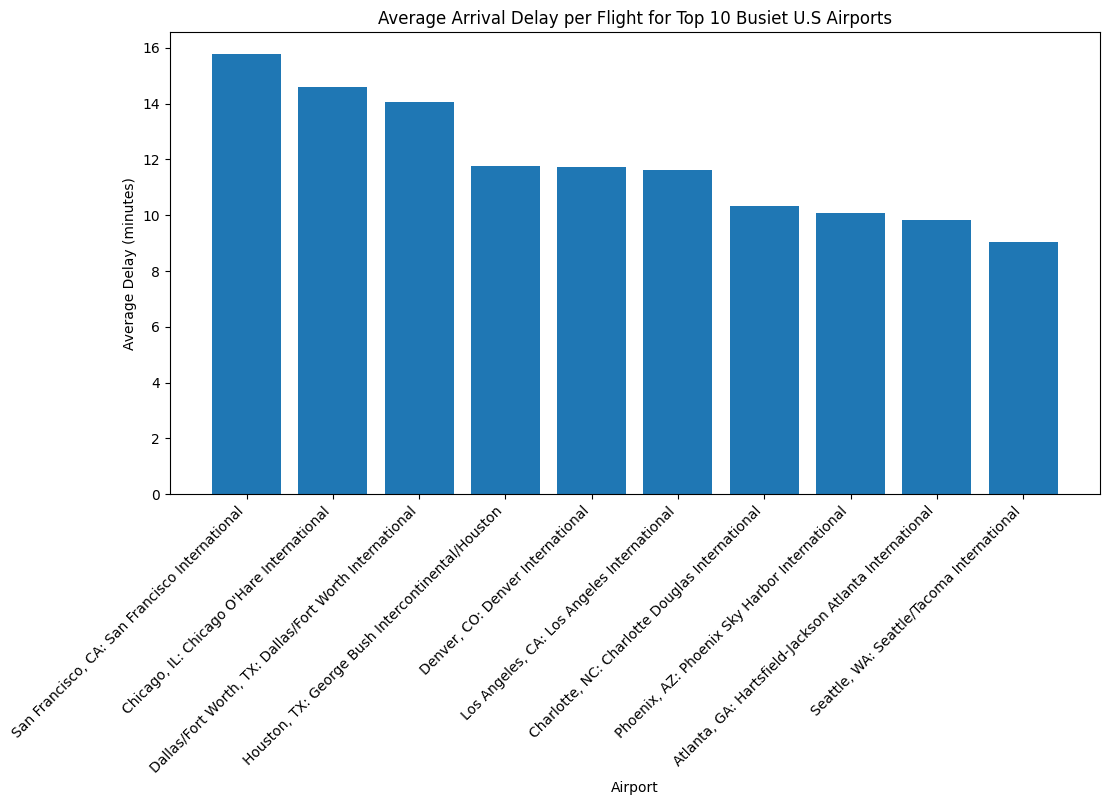

In [11]:

#Step 1: Top 10 busiest airports
top10_airports = airport_totals.sort_values('arr_flights', ascending=False).head(10)

#Step 2: Filter data for top 10 airports
df_top10 = airplane_df[airplane_df['airport'].isin(top10_airports['airport'])]

#Step 3: Calculate average delay for top 10 airports
delay_avg = df_top10.groupby(['airport', 'airport_name'], as_index=False).agg({'arr_delay': 'sum', 'arr_flights': 'sum'})
delay_avg['avg_delay'] = delay_avg['arr_delay'] / delay_avg['arr_flights']

#Step 4: Sort by average delay per flight
delay_avg = delay_avg.sort_values('avg_delay', ascending=False)

#Step 5: Plot a bar chart
plt.figure(figsize=(12,6))
plt.bar(delay_avg['airport_name'], delay_avg['avg_delay'])
plt.title("Average Arrival Delay per Flight for Top 10 Busiet U.S Airports")
plt.xlabel("Airport")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45, ha = 'right')
plt.show()


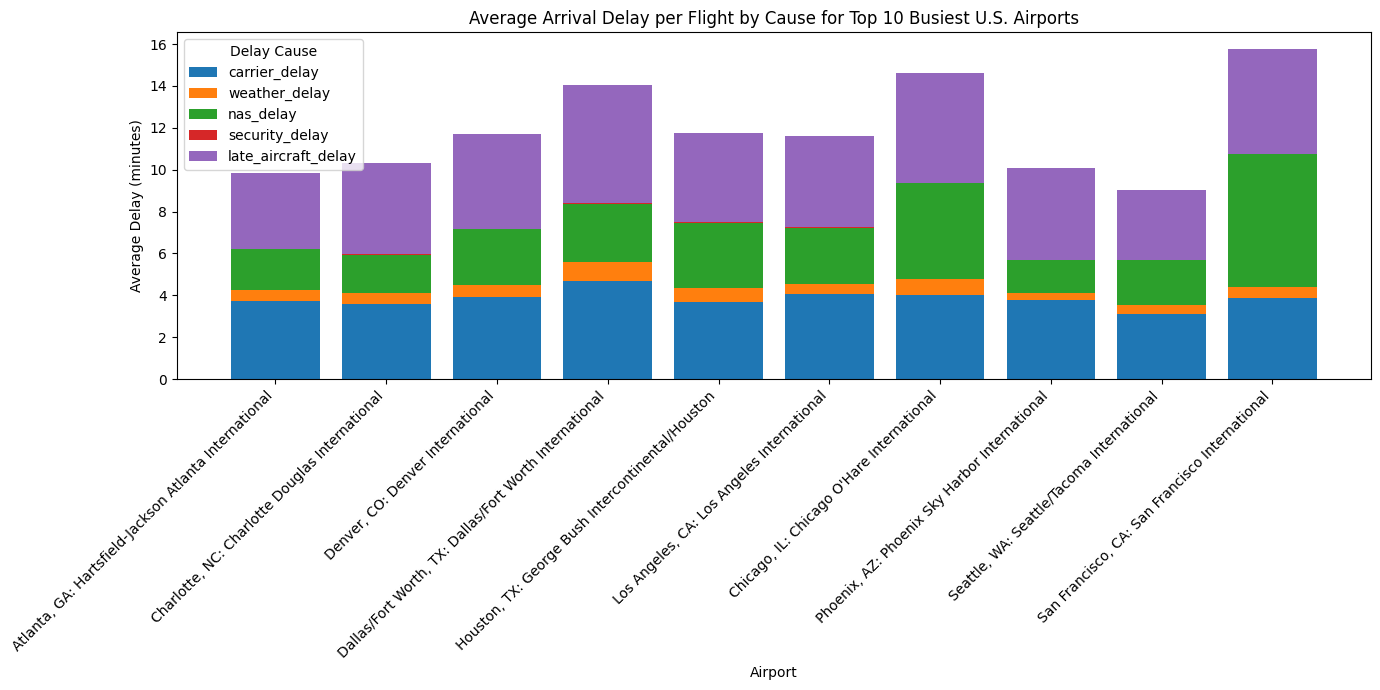

In [12]:
import matplotlib.pyplot as plt

# Step 1: Top 10 busiest airports
top10_airports = airport_totals.sort_values('arr_flights', ascending=False).head(10)

# Step 2: Filter data for top 10 airports
df_top10 = airplane_df[airplane_df['airport'].isin(top10_airports['airport'])]

# Step 3: List of main delay causes
cause_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Step 4: Compute total delay by cause and number of flights per airport
delay_by_cause = df_top10.groupby(['airport', 'airport_name'])[cause_cols + ['arr_flights']].sum().reset_index()

# Step 5: Convert to average delay per flight for each cause
for cause in cause_cols:
    delay_by_cause[cause] = delay_by_cause[cause] / delay_by_cause['arr_flights']

# Step 6: Plot stacked bar chart
plt.figure(figsize=(14,7))
bottom = None
for cause in cause_cols:
    if bottom is None:
        plt.bar(delay_by_cause['airport_name'], delay_by_cause[cause], label=cause)
        bottom = delay_by_cause[cause]
    else:
        plt.bar(delay_by_cause['airport_name'], delay_by_cause[cause], bottom=bottom, label=cause)
        bottom += delay_by_cause[cause]

plt.title("Average Arrival Delay per Flight by Cause for Top 10 Busiest U.S. Airports")
plt.xlabel("Airport")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Delay Cause")
plt.tight_layout()
plt.show()


In [13]:
delay_by_cause

,airport,airport_name,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_flights
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",9.825892,0.506602,1.952965,0.012827,3.607387,3557460.0
1,CLT,"Charlotte, NC: Charlotte Douglas International",10.325432,0.536892,1.841848,0.019762,4.361566,1671963.0
2,DEN,"Denver, CO: Denver International",11.708941,0.573515,2.654029,0.012706,4.533536,2391883.0
3,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",14.062269,0.927696,2.761837,0.021091,5.671253,2588687.0
4,IAH,"Houston, TX: George Bush Intercontinental/Houston",11.757036,0.699197,3.103299,0.011005,4.269384,1459063.0
5,LAX,"Los Angeles, CA: Los Angeles International",11.606148,0.493168,2.659653,0.028330,4.363318,2017064.0
6,ORD,"Chicago, IL: Chicago O'Hare International",14.602104,0.766162,4.546570,0.013813,5.244658,2774102.0
7,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",10.067098,0.350110,1.563241,0.025297,4.367034,1618391.0
8,SEA,"Seattle, WA: Seattle/Tacoma International",9.033454,0.445122,2.135499,0.020525,3.337251,1378444.0
9,SFO,"San Francisco, CA: San Francisco International",15.772259,0.555857,6.330158,0.015914,5.020553,1501997.0


In [14]:
df_top10

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
5,2023,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1636.0,256.0,55.98,27.81,63.64,0.00,108.57,32.0,11.0,29768.0,9339.0,4557.0,4676.0,0.0,11196.0
23,2023,8,9E,Endeavor Air Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",232.0,38.0,9.94,1.00,13.46,0.00,13.60,9.0,1.0,2617.0,752.0,49.0,753.0,0.0,1063.0
96,2023,8,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",759.0,225.0,67.14,14.76,38.73,0.21,104.17,16.0,5.0,20112.0,5665.0,950.0,2152.0,11.0,11334.0
116,2023,8,AA,American Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",10497.0,2500.0,636.40,143.81,503.91,9.07,1206.81,230.0,43.0,294629.0,110971.0,14250.0,29468.0,678.0,139262.0
122,2023,8,AA,American Airlines Inc.,DEN,"Denver, CO: Denver International",739.0,237.0,77.39,5.96,61.23,0.30,92.12,9.0,1.0,21177.0,6971.0,776.0,2876.0,29.0,10525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171589,2013,8,YV,Mesa Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",64.0,13.0,8.23,0.00,2.95,0.00,1.81,0.0,0.0,898.0,601.0,0.0,184.0,0.0,113.0
171617,2013,8,YV,Mesa Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",892.0,173.0,29.87,6.08,40.33,0.74,95.97,26.0,2.0,12237.0,2709.0,289.0,1929.0,55.0,7255.0
171620,2013,8,YV,Mesa Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1017.0,68.0,24.30,1.34,18.30,1.53,22.52,7.0,3.0,3281.0,1886.0,56.0,451.0,79.0,809.0
171640,2013,8,YV,Mesa Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",135.0,37.0,8.93,0.00,14.42,0.00,13.65,3.0,0.0,1929.0,282.0,0.0,636.0,0.0,1011.0
